# **Add labels to circular barplot**

#### การใส่ Label เข้าไปในแต่ละ bar โดยใช้ฟังก์ชั่น **geom_text()**

-- Attaching packages --------------------------------------- tidyverse 1.3.0 --

<U+221A> ggplot2 3.2.1     <U+221A> purrr   0.3.3
<U+221A> tibble  2.1.3     <U+221A> dplyr   0.8.3
<U+221A> tidyr   1.0.0     <U+221A> stringr 1.4.0
<U+221A> readr   1.3.1     <U+221A> forcats 0.4.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()



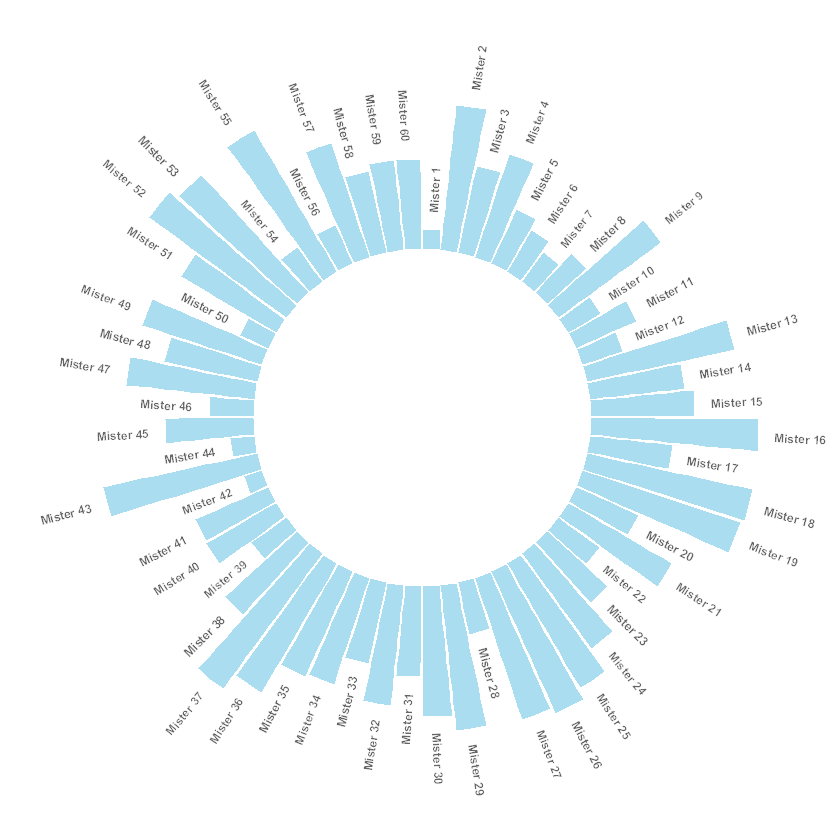

In [3]:
# Libraries
library(tidyverse)
 
# Create dataset
data <- data.frame(
  id=seq(1,60),
  individual=paste( "Mister ", seq(1,60), sep=""),
  value=sample( seq(10,100), 60, replace=T)
)
 
# ----- This section prepare a dataframe for labels ---- #
# Get the name and the y position of each label
label_data <- data
 
# calculate the ANGLE of the labels
number_of_bar <- nrow(label_data)
angle <-  90 - 360 * (label_data$id-0.5) /number_of_bar     # I substract 0.5 because the letter must have the angle of the center of the bars. Not extreme right(1) or extreme left (0)
 
# calculate the alignment of labels: right or left
# If I am on the left part of the plot, my labels have currently an angle < -90
label_data$hjust<-ifelse( angle < -90, 1, 0)
 
# flip angle BY to make them readable
label_data$angle<-ifelse(angle < -90, angle+180, angle)
# ----- ------------------------------------------- ---- #
 
 
# Start the plot
p <- ggplot(data, aes(x=as.factor(id), y=value)) +       # Note that id is a factor. If x is numeric, there is some space between the first bar
  
  # This add the bars with a blue color
  geom_bar(stat="identity", fill=alpha("skyblue", 0.7)) +
  
  # Limits of the plot = very important. The negative value controls the size of the inner circle, the positive one is useful to add size over each bar
  ylim(-100,120) +
  
  # Custom the theme: no axis title and no cartesian grid
  theme_minimal() +
  theme(
    axis.text = element_blank(),
    axis.title = element_blank(),
    panel.grid = element_blank(),
    plot.margin = unit(rep(-1,4), "cm")      # Adjust the margin to make in sort labels are not truncated!
  ) +
  
  # This makes the coordinate polar instead of cartesian.
  coord_polar(start = 0) +
  
  # Add the labels, using the label_data dataframe that we have created before
  geom_text(data=label_data, aes(x=id, y=value+10, label=individual, hjust=hjust), color="black", fontface="bold",alpha=0.6, size=2.5, angle= label_data$angle, inherit.aes = FALSE ) 
 
p